<a href="https://colab.research.google.com/github/jsm-UOC/tensorflowCourse/blob/main/ScalingUpANNCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scaling up in TensorFlow

In [ ]:
!pip install tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

## Creating helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-09 05:27:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-09 05:27:25 (88.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

## 101 Food Classes Data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-05-09 05:27:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  21.6MB/s    in 81s     

2023-05-09 05:28:48 (19.2 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/frozen_yogurt'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/club_sandwich'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/onion_rings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/donuts'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/macarons'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caprese_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/spring_rolls'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/shrimp_and_grits'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caesar_salad'.
There are 0 directories and 75 imag

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE,
                                                                                shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


## Train the model

In [ ]:
checkpoint_path = "101_food_classes_10_percent_data_model_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True,
                                                         monitor="val_accuracy",
                                                         save_best_only=True)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)
], name="data_augmentation")

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

16705208/16705208 [==============================] - 2s 0us/step


In [ ]:
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")

x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)

outputs = layers.Dense(len(train_data_all_10_percent.class_names),
                       activation="softmax",
                       name="output_layer")(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_avg_pool_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5,
                                           steps_per_epoch=len(train_data_all_10_percent),
                                           validation_data=test_data,
                                           validation_steps=int(0.15*len(test_data)),
                                           callbacks=[checkpoint_callback])

Epoch 1/5
237/237 [==============================] - 97s 351ms/step - loss: 3.3818 - accuracy: 0.2681 - val_loss: 2.4126 - val_accuracy: 0.4751
Epoch 2/5
237/237 [==============================] - 71s 297ms/step - loss: 2.2022 - accuracy: 0.4990 - val_loss: 2.0063 - val_accuracy: 0.5188
Epoch 3/5
237/237 [==============================] - 61s 257ms/step - loss: 1.8221 - accuracy: 0.5670 - val_loss: 1.8410 - val_accuracy: 0.5429
Epoch 4/5
237/237 [==============================] - 58s 244ms/step - loss: 1.5993 - accuracy: 0.6145 - val_loss: 1.7698 - val_accuracy: 0.5498
Epoch 5/5
237/237 [==============================] - 54s 226ms/step - loss: 1.4507 - accuracy: 0.6428 - val_loss: 1.7360 - val_accuracy: 0.5540


In [ ]:
fine_tuning_results = model.evaluate(test_data)

790/790 [==============================] - 60s 76ms/step - loss: 1.5736 - accuracy: 0.5878


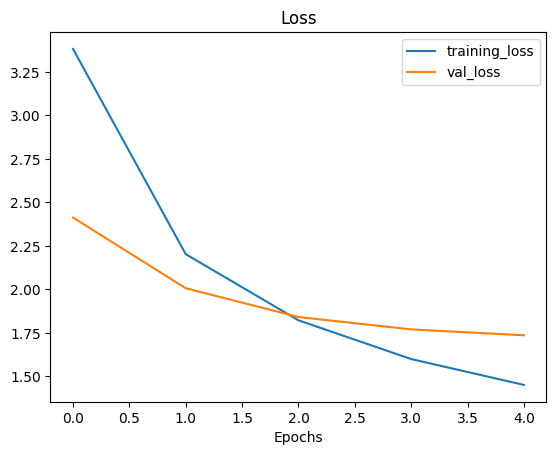

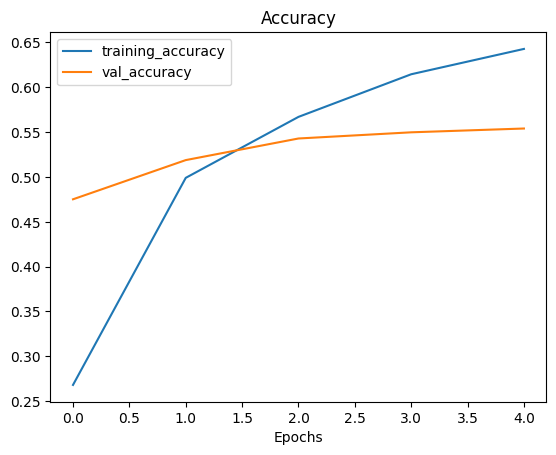

In [ ]:
plot_loss_curves(history_all_classes_10_percent)

## Fine Tuning

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 tf.math.truediv False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=["accuracy"])

In [ ]:
fine_tune_epochs = 10

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                           epochs=fine_tune_epochs,
                                           steps_per_epoch=len(train_data_all_10_percent),
                                           validation_data=test_data,
                                           validation_steps=int(0.15*len(test_data)),
                                           initial_epoch=history_all_classes_10_percent.epoch[-1])

Epoch 5/10
237/237 [==============================] - 63s 236ms/step - loss: 1.2204 - accuracy: 0.6857 - val_loss: 1.6892 - val_accuracy: 0.5561
Epoch 6/10
237/237 [==============================] - 49s 205ms/step - loss: 1.1067 - accuracy: 0.7067 - val_loss: 1.7130 - val_accuracy: 0.5516
Epoch 7/10
237/237 [==============================] - 54s 225ms/step - loss: 1.0104 - accuracy: 0.7281 - val_loss: 1.7037 - val_accuracy: 0.5561
Epoch 8/10
237/237 [==============================] - 49s 205ms/step - loss: 0.9415 - accuracy: 0.7496 - val_loss: 1.6961 - val_accuracy: 0.5591
Epoch 9/10
237/237 [==============================] - 45s 189ms/step - loss: 0.8965 - accuracy: 0.7580 - val_loss: 1.6913 - val_accuracy: 0.5620
Epoch 10/10
237/237 [==============================] - 47s 195ms/step - loss: 0.8300 - accuracy: 0.7791 - val_loss: 1.7210 - val_accuracy: 0.5548


In [ ]:
fine_tuning_results_2 = model.evaluate(test_data)

790/790 [==============================] - 60s 76ms/step - loss: 1.4887 - accuracy: 0.6071


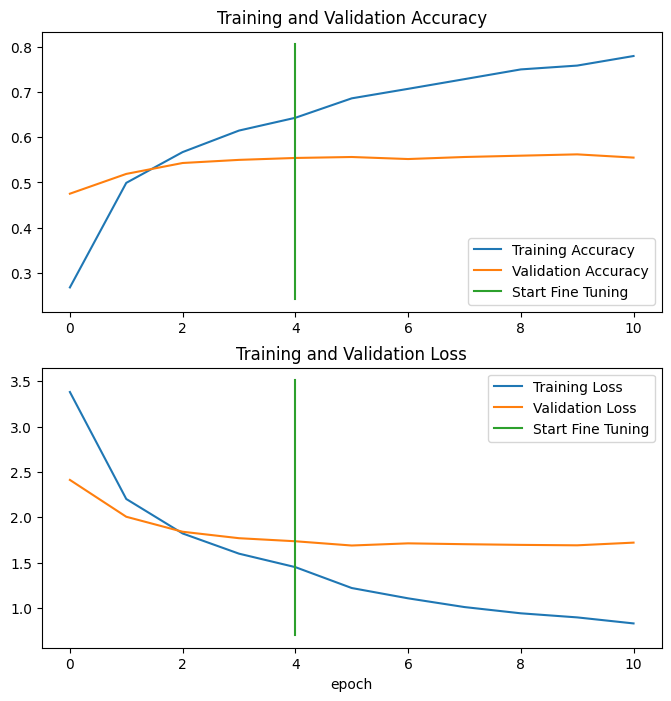

In [ ]:
compare_historys(history_all_classes_10_percent, history_all_classes_10_percent_fine_tune)

## Save and Load our model

In [ ]:
model.save("/content/drive/MyDrive/TF_Course/101_food_classes_10_percent_saved_model_fine_tune_1")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/TF_Course/101_food_classes_10_percent_saved_model_fine_tune_1")

## Evaluating the performance

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

--2023-05-09 05:46:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip’

06_101_food_class_1 100%[===================>]  44.59M  14.7MB/s    in 3.0s    

2023-05-09 05:46:23 (14.7 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip’ saved [46760742/46760742]



In [ ]:
model = tf.keras.models.load_model("06_101_food_class_10_percent_saved_big_dog_model")

In [ ]:
results_downloaded_model = model.evaluate(test_data)

790/790 [==============================] - 66s 81ms/step - loss: 1.8027 - accuracy: 0.6078


In [ ]:
preds_probs = model.predict(test_data, verbose=1)

790/790 [==============================] - 68s 84ms/step


In [ ]:
len(preds_probs), len(test_data)

(25250, 790)

In [ ]:
preds_probs[:10]

array([[5.9542213e-02, 3.5742137e-06, 4.1377041e-02, ..., 1.4138676e-09,
        8.3530962e-05, 3.0897709e-03],
       [9.6401680e-01, 1.3753220e-09, 8.4780209e-04, ..., 5.4287098e-05,
        7.8361918e-12, 9.8465835e-10],
       [9.5925879e-01, 3.2533775e-05, 1.4866964e-03, ..., 7.1891412e-07,
        5.4397583e-07, 4.0275929e-05],
       ...,
       [4.7313288e-01, 1.2931191e-07, 1.4805571e-03, ..., 5.9750077e-04,
        6.6969005e-05, 2.3469400e-05],
       [4.4571895e-02, 4.7265519e-07, 1.2258518e-01, ..., 6.3498619e-06,
        7.5318503e-06, 3.6778899e-03],
       [7.2439003e-01, 1.9249673e-09, 5.2310970e-05, ..., 1.2291380e-03,
        1.5792693e-09, 9.6395343e-05]], dtype=float32)

In [ ]:
preds_probs[0], len(preds_probs[0])

(array([5.95422126e-02, 3.57421368e-06, 4.13770415e-02, 1.06606324e-09,
        8.16142531e-09, 8.66396288e-09, 8.09274070e-07, 8.56529539e-07,
        1.98591606e-05, 8.09774235e-07, 3.17277338e-09, 9.86737973e-07,
        2.85322894e-04, 7.80490172e-10, 7.42304197e-04, 3.89164816e-05,
        6.47405386e-06, 2.49774143e-06, 3.78911900e-05, 2.06782616e-07,
        1.55384460e-05, 8.15073861e-07, 2.62306344e-06, 2.00106967e-07,
        8.38279050e-07, 5.42160706e-06, 3.73909870e-06, 1.31505775e-08,
        2.77615804e-03, 2.80519871e-05, 6.85621337e-10, 2.55748728e-05,
        1.66889717e-04, 7.64069696e-10, 4.04530176e-04, 1.31506805e-08,
        1.79573726e-06, 1.44482397e-06, 2.30628941e-02, 8.24670678e-07,
        8.53659003e-07, 1.71386728e-06, 7.05256207e-06, 1.84021616e-08,
        2.85534497e-07, 7.94839616e-06, 2.06815457e-06, 1.85251992e-07,
        3.36197594e-08, 3.15226032e-04, 1.04109295e-05, 8.54483289e-07,
        8.47418368e-01, 1.05554509e-05, 4.40948213e-07, 3.740417

In [ ]:
sum(preds_probs[0])

1.0000001177719229

In [ ]:
tf.argmax(preds_probs[0]), test_data.class_names[tf.argmax(preds_probs[0])]

(<tf.Tensor: shape=(), dtype=int64, numpy=52>, 'gyoza')

In [ ]:
pred_classes = preds_probs.argmax(axis=1)

pred_classes[:10]

array([52,  0,  0, 80, 79, 61, 29,  0, 85,  0])

In [ ]:
len(pred_classes)

25250

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
len(y_labels)

25250

## Evaluating our model

In [ ]:
results_downloaded_model

[1.8027204275131226, 0.6077623963356018]

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true=y_labels,
                                  y_pred=pred_classes)

In [ ]:
sklearn_accuracy

0.6077623762376237

In [ ]:
import numpy as np
np.isclose(results_downloaded_model[1], sklearn_accuracy)

True

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
cm_model = make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=test_data.class_names,
                      figsize=(100, 100),
                      text_size=20)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ## CHANGES
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

  return cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels,
                            y_pred=pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24       250
           1       0.51      0.69      0.59       250
           2       0.56      0.65      0.60       250
           3       0.74      0.53      0.62       250
           4       0.73      0.43      0.54       250
           5       0.34      0.54      0.42       250
           6       0.67      0.79      0.72       250
           7       0.82      0.76      0.79       250
           8       0.40      0.37      0.39       250
           9       0.62      0.44      0.51       250
          10       0.62      0.42      0.50       250
          11       0.84      0.49      0.62       250
          12       0.52      0.74      0.61       250
          13       0.56      0.60      0.58       250
          14       0.56      0.59      0.57       250
          15       0.44      0.32      0.37       250
          16       0.45      0.75      0.57       250
          17       0.37    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.29310344827586204,
  'recall': 0.204,
  'f1-score': 0.24056603773584903,
  'support': 250},
 '1': {'precision': 0.5088235294117647,
  'recall': 0.692,
  'f1-score': 0.5864406779661017,
  'support': 250},
 '2': {'precision': 0.5625,
  'recall': 0.648,
  'f1-score': 0.6022304832713754,
  'support': 250},
 '3': {'precision': 0.7415730337078652,
  'recall': 0.528,
  'f1-score': 0.616822429906542,
  'support': 250},
 '4': {'precision': 0.7346938775510204,
  'recall': 0.432,
  'f1-score': 0.544080604534005,
  'support': 250},
 '5': {'precision': 0.34177215189873417,
  'recall': 0.54,
  'f1-score': 0.41860465116279066,
  'support': 250},
 '6': {'precision': 0.6677966101694915,
  'recall': 0.788,
  'f1-score': 0.7229357798165138,
  'support': 250},
 '7': {'precision': 0.8197424892703863,
  'recall': 0.764,
  'f1-score': 0.7908902691511386,
  'support': 250},
 '8': {'precision': 0.4025974025974026,
  'recall': 0.372,
  'f1-score': 0.3866943866943867,
  'support': 250},
 '9

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:
    class_f1_scores[test_data.class_names[int(k)]] = v["f1-score"]

In [ ]:
class_f1_scores

{'apple_pie': 0.24056603773584903,
 'baby_back_ribs': 0.5864406779661017,
 'baklava': 0.6022304832713754,
 'beef_carpaccio': 0.616822429906542,
 'beef_tartare': 0.544080604534005,
 'beet_salad': 0.41860465116279066,
 'beignets': 0.7229357798165138,
 'bibimbap': 0.7908902691511386,
 'bread_pudding': 0.3866943866943867,
 'breakfast_burrito': 0.5117370892018779,
 'bruschetta': 0.5047619047619047,
 'caesar_salad': 0.6161616161616161,
 'cannoli': 0.6105610561056106,
 'caprese_salad': 0.5775193798449612,
 'carrot_cake': 0.574757281553398,
 'ceviche': 0.36744186046511623,
 'cheese_plate': 0.5654135338345864,
 'cheesecake': 0.42546063651591287,
 'chicken_curry': 0.5008403361344538,
 'chicken_quesadilla': 0.6411889596602972,
 'chicken_wings': 0.7123809523809523,
 'chocolate_cake': 0.45261669024045265,
 'chocolate_mousse': 0.3291592128801431,
 'churros': 0.7134935304990757,
 'clam_chowder': 0.7708779443254817,
 'club_sandwich': 0.734020618556701,
 'crab_cakes': 0.4625550660792952,
 'creme_brulee

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)

In [ ]:
f1_scores[:10]

class_name  f1-score
33              edamame  0.937143
63             macarons  0.895397
75                  pho  0.866538
91  spaghetti_carbonara  0.847656
69              oysters  0.834008
68          onion_rings  0.832618
65              mussels  0.820000
88        seaweed_salad  0.813008
64            miso_soup  0.812977
45        frozen_yogurt  0.811429

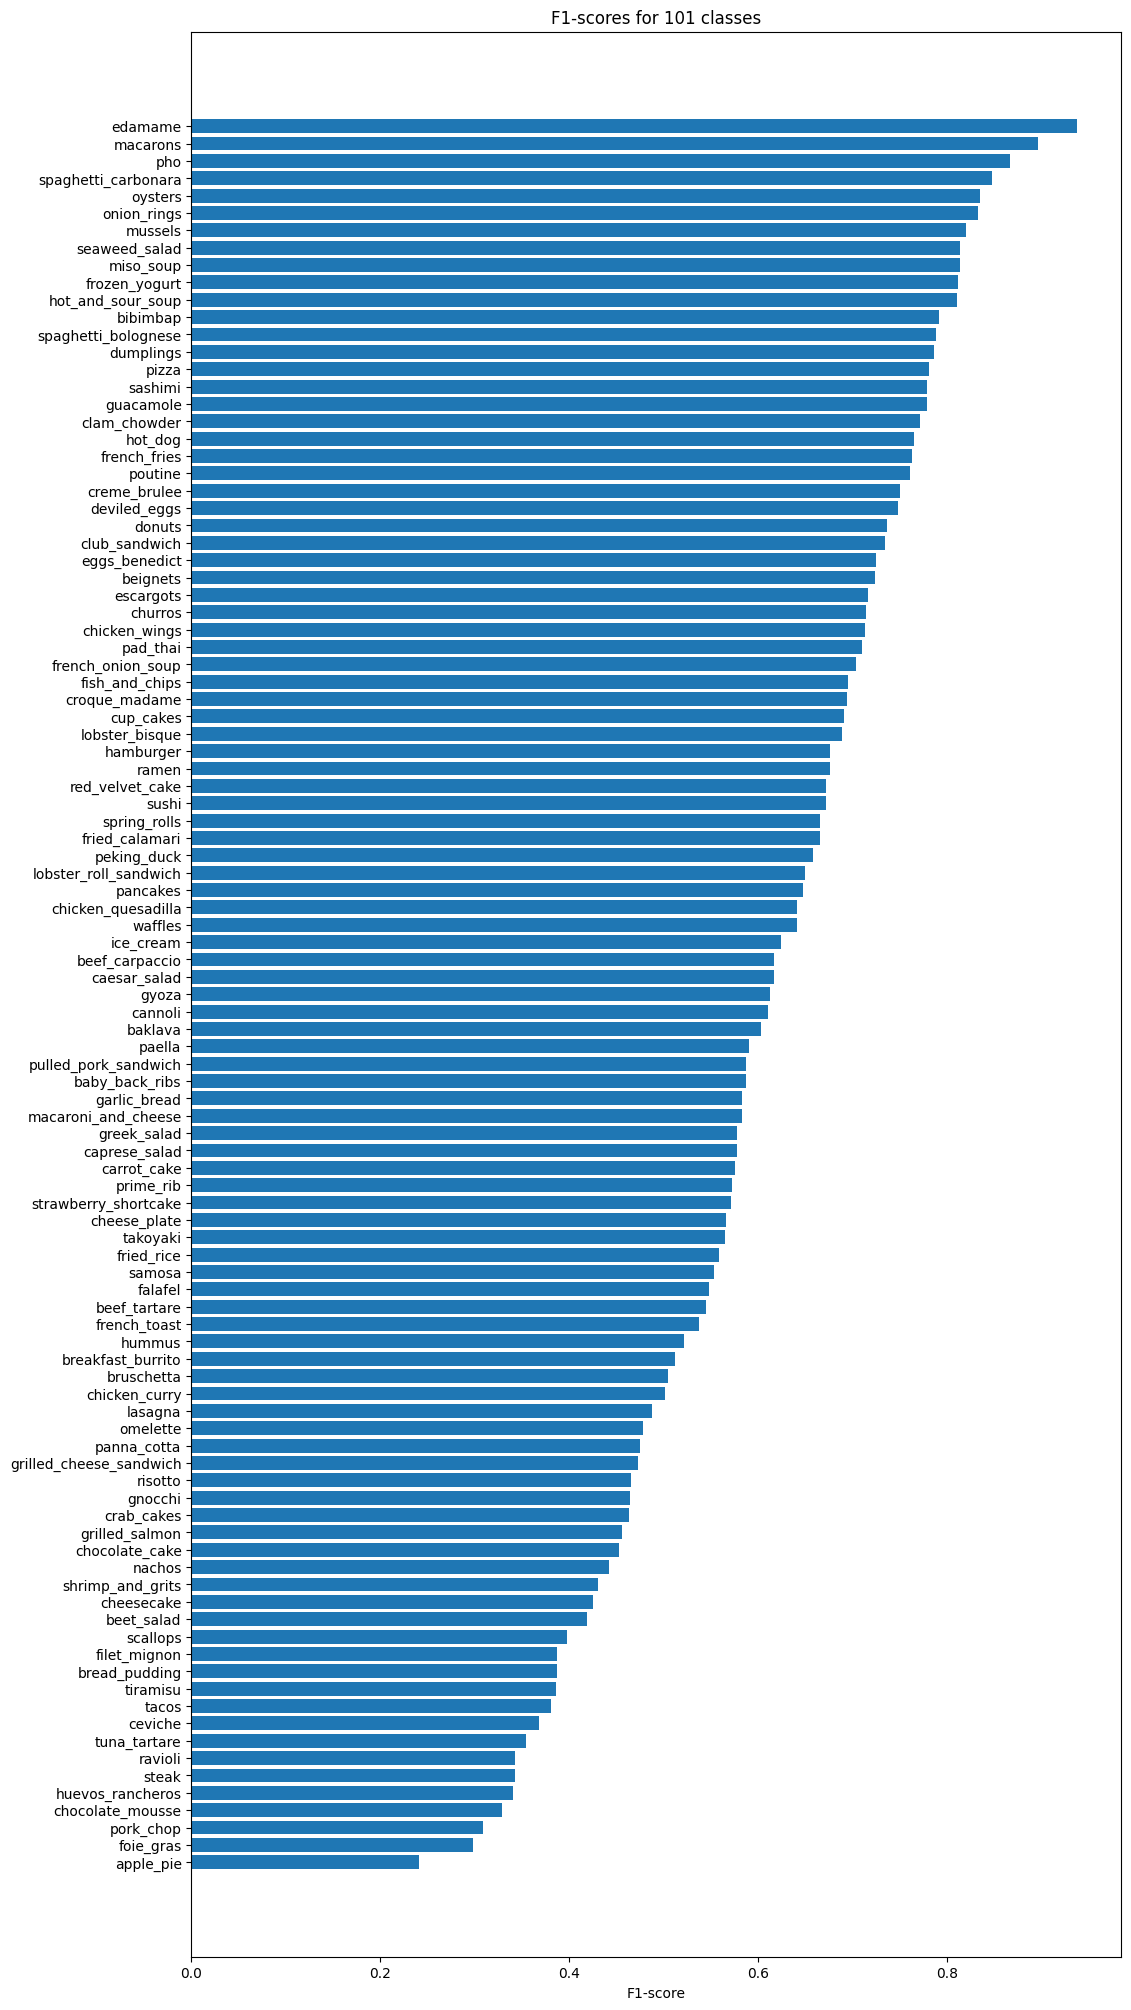

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,25))
scores = ax.barh(range(len(f1_scores)), f1_scores['f1-score'].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores['class_name'].values)
ax.set_xlabel("F1-score")
ax.set_title("F1-scores for 101 classes")
ax.invert_yaxis()

In [ ]:
pred_classes

array([ 52,   0,   0, ..., 100,  94, 100])

## Visualizing predictions

In [ ]:

def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 28ms/step


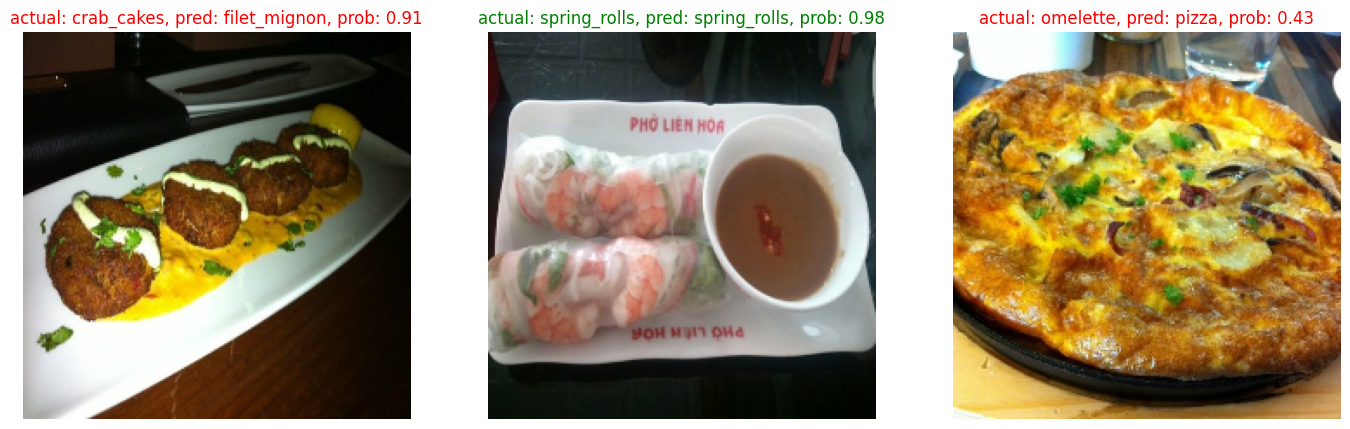

In [ ]:
class_names = test_data.class_names

# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

## Finding the most wrong predictions

In [ ]:
filepaths = []

for path in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg",
                                 shuffle=False):
  filepaths.append(path.numpy())

filepaths[:10]

[b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'/content/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
import pandas as pd
pred_df = pd.DataFrame({"img_path":filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": preds_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})

pred_df[:10]

img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0      52   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0      80   
4  b'/content/101_food_classes_10_percent/test/ap...       0      79   
5  b'/content/101_food_classes_10_percent/test/ap...       0      61   
6  b'/content/101_food_classes_10_percent/test/ap...       0      29   
7  b'/content/101_food_classes_10_percent/test/ap...       0       0   
8  b'/content/101_food_classes_10_percent/test/ap...       0      85   
9  b'/content/101_food_classes_10_percent/test/ap...       0       0   

   pred_conf y_true_classname       y_pred_classname  
0   0.847418        apple_pie                  gyoza  
1   0.964017        apple_pie              apple_pie  
2   0.959259        apple_pie              apple_pie  
3   0.658607        apple_pie   pulled_pork_sandwich  
4   0.367902        apple_pie              prime_rib  
5   0.456755        apple_pie  lobster_roll_sandwich  
6   0.611244        apple_pie              cup_cakes  
7   0.473133        apple_pie              apple_pie  
8   0.245396        apple_pie                 samosa  
9   0.724390        apple_pie              apple_pie

In [ ]:
pred_df["pred_correct"] = pred_df["y_true_classname"] == pred_df["y_pred_classname"]

In [ ]:
pred_df[:10]

img_path  y_true  y_pred  \
0  b'/content/101_food_classes_10_percent/test/ap...       0      52   
1  b'/content/101_food_classes_10_percent/test/ap...       0       0   
2  b'/content/101_food_classes_10_percent/test/ap...       0       0   
3  b'/content/101_food_classes_10_percent/test/ap...       0      80   
4  b'/content/101_food_classes_10_percent/test/ap...       0      79   
5  b'/content/101_food_classes_10_percent/test/ap...       0      61   
6  b'/content/101_food_classes_10_percent/test/ap...       0      29   
7  b'/content/101_food_classes_10_percent/test/ap...       0       0   
8  b'/content/101_food_classes_10_percent/test/ap...       0      85   
9  b'/content/101_food_classes_10_percent/test/ap...       0       0   

   pred_conf y_true_classname       y_pred_classname  pred_correct  
0   0.847418        apple_pie                  gyoza         False  
1   0.964017        apple_pie              apple_pie          True  
2   0.959259        apple_pie              apple_pie          True  
3   0.658607        apple_pie   pulled_pork_sandwich         False  
4   0.367902        apple_pie              prime_rib         False  
5   0.456755        apple_pie  lobster_roll_sandwich         False  
6   0.611244        apple_pie              cup_cakes         False  
7   0.473133        apple_pie              apple_pie          True  
8   0.245396        apple_pie                 samosa         False  
9   0.724390        apple_pie              apple_pie          True

In [ ]:
top_100_wrong = pred_df[pred_df['pred_correct'] == False].sort_values('pred_conf', ascending=False)

top_100_wrong

img_path  y_true  y_pred  \
21810  b'/content/101_food_classes_10_percent/test/sc...      87      29   
231    b'/content/101_food_classes_10_percent/test/ap...       0     100   
15359  b'/content/101_food_classes_10_percent/test/lo...      61      53   
23539  b'/content/101_food_classes_10_percent/test/st...      94      83   
21400  b'/content/101_food_classes_10_percent/test/sa...      85      92   
...                                                  ...     ...     ...   
22303  b'/content/101_food_classes_10_percent/test/sh...      89      47   
15646  b'/content/101_food_classes_10_percent/test/ma...      62      19   
6092   b'/content/101_food_classes_10_percent/test/cl...      24      16   
168    b'/content/101_food_classes_10_percent/test/ap...       0      80   
11062  b'/content/101_food_classes_10_percent/test/fr...      44      97   

       pred_conf       y_true_classname      y_pred_classname  pred_correct  
21810   0.999997               scallops             cup_cakes         False  
231     0.999995              apple_pie               waffles         False  
15359   0.999988  lobster_roll_sandwich             hamburger         False  
23539   0.999987   strawberry_shortcake       red_velvet_cake         False  
21400   0.999981                 samosa          spring_rolls         False  
...          ...                    ...                   ...           ...  
22303   0.141998       shrimp_and_grits               gnocchi         False  
15646   0.139136    macaroni_and_cheese    chicken_quesadilla         False  
6092    0.137614           clam_chowder          cheese_plate         False  
168     0.128813              apple_pie  pulled_pork_sandwich         False  
11062   0.126823             fried_rice              takoyaki         False  

[9904 rows x 7 columns]

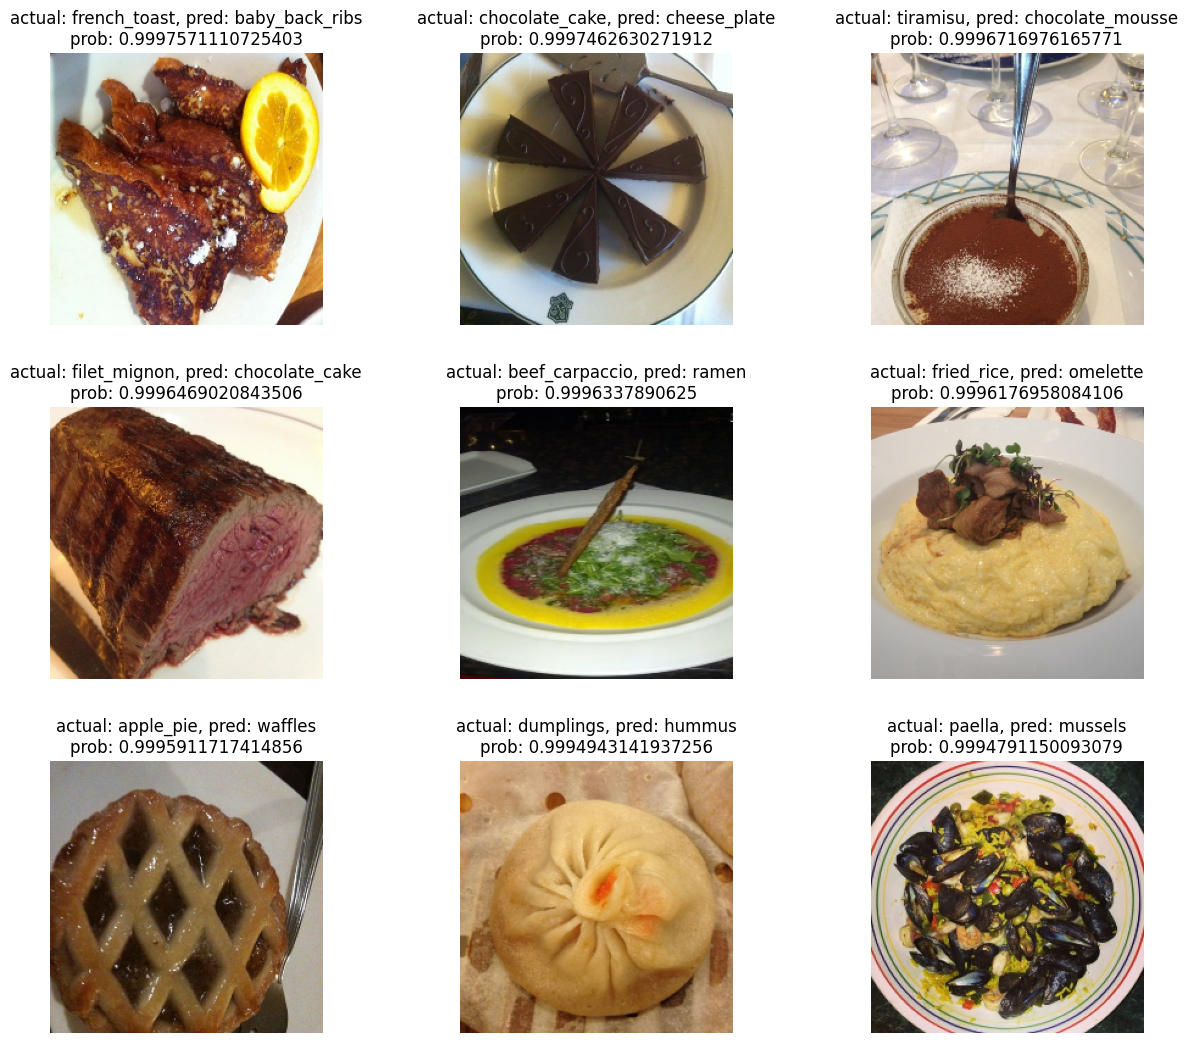

In [ ]:
images_to_view = 9
start_index = 0
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prep_image(row[1], scale=False)
  _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row
  plt.imshow(img/255.)
  plt.title(f"actual: {y_true_classname}, pred: {y_pred_classname}\nprob: {pred_prob}")
  plt.axis(False)